In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [18]:
df.drop_duplicates()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [19]:
print("Total: " ,df['Exited'].count())
df['Exited'].value_counts()

Total:  10000


Exited
0    7963
1    2037
Name: count, dtype: int64

In [20]:
X= df.iloc[:,3:13]
Y= df.iloc[:,13]

In [34]:
#One-Hat Encoding
temp=pd.get_dummies(X[['Geography','Gender']],drop_first=True)

In [36]:
X.drop(['Geography','Gender'],axis=1,inplace=True)

In [41]:
# Concatenating with orignal dataset
X=pd.concat([X,temp],axis=1)

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train,X_test,Y_train,Y_test= train_test_split(X,Y,train_size=0.2, random_state=0)

In [47]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
3477,623,40,7,0.00,1,1,1,25904.12,False,True,False
9567,724,29,4,0.00,1,1,0,8982.75,False,False,True
8284,711,39,3,152462.79,1,1,0,90305.97,False,False,False
3129,631,37,9,131519.49,2,1,1,51752.18,True,False,True
8427,753,40,0,3768.69,2,1,0,177065.24,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
9225,594,32,4,120074.97,2,1,1,162961.79,True,False,False
4859,794,22,4,114440.24,1,1,1,107753.07,False,True,False
3264,738,35,5,161274.05,2,1,0,181429.87,False,False,True
9845,590,38,9,0.00,2,1,1,148750.16,False,True,False


In [48]:
X_train.fillna(0, inplace=True)

In [49]:
#Feature Scaling
scaler=StandardScaler()
X_train_trf=scaler.fit_transform(X_train)
X_test_trf=scaler.transform(X_test)

In [51]:
X_train_trf

array([[-0.32530497,  0.12352963,  0.67535045, ..., -0.56657212,
         1.71830416, -1.08456377],
       [ 0.71071446, -0.93639701, -0.35571894, ..., -0.56657212,
        -0.58196914,  0.9220297 ],
       [ 0.57736542,  0.02717266, -0.69940874, ..., -0.56657212,
        -0.58196914, -1.08456377],
       ...,
       [ 0.85432111, -0.35825521, -0.01202914, ..., -0.56657212,
        -0.58196914,  0.9220297 ],
       [-0.66380637, -0.0691843 ,  1.36273004, ..., -0.56657212,
         1.71830416, -1.08456377],
       [-0.32530497,  0.89438537, -1.38678833, ...,  1.76500038,
        -0.58196914, -1.08456377]])

In [52]:
X_test_trf

array([[-0.59200304, -0.35825521,  1.01904025, ...,  1.76500038,
        -0.58196914, -1.08456377],
       [-1.35106678,  0.12352963, -1.04309853, ..., -0.56657212,
        -0.58196914, -1.08456377],
       [ 0.52607733,  0.31624357,  1.01904025, ..., -0.56657212,
         1.71830416, -1.08456377],
       ...,
       [-2.40760144, -0.74368308, -1.38678833, ...,  1.76500038,
        -0.58196914, -1.08456377],
       [-1.14591442,  0.2198866 , -0.35571894, ..., -0.56657212,
         1.71830416, -1.08456377],
       [ 1.33642916, -0.26189824, -1.04309853, ...,  1.76500038,
        -0.58196914, -1.08456377]])

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (2000, 11)
X_test shape: (8000, 11)


Creating ANN Model

In [54]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,ReLU,PReLU
from tensorflow.keras.layers import Dropout


In [56]:
#Sequential model
model= Sequential()

In [59]:
# Adding the input Layer
model.add(Dense(3,activation='relu',input_dim=11))

#Adding Hidden Layer
model.add(Dense(units=7,activation='relu'))
model.add(Dense(units=6,activation='relu'))

#Adding the Output Layer
model.add(Dense(1,activation='sigmoid'))


In [61]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 36        
                                                                 
 dense_1 (Dense)             (None, 7)                 28        
                                                                 
 dense_2 (Dense)             (None, 6)                 48        
                                                                 
 dense_3 (Dense)             (None, 3)                 21        
                                                                 
 dense_4 (Dense)             (None, 7)                 28        
                                                                 
 dense_5 (Dense)             (None, 6)                 48        
                                                                 
 dense_6 (Dense)             (None, 3)                 2

In [63]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [66]:
opt= tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [67]:
history= model.fit(X_train_trf,Y_train,epochs=15,validation_split=0.33)

Epoch 1/15
42/42 [==============================] - 0s 5ms/step - loss: 0.4383 - accuracy: 0.7961 - val_loss: 0.4500 - val_accuracy: 0.8064
Epoch 2/15
42/42 [==============================] - 0s 5ms/step - loss: 0.4376 - accuracy: 0.7939 - val_loss: 0.4495 - val_accuracy: 0.8018
Epoch 3/15
42/42 [==============================] - 0s 5ms/step - loss: 0.4378 - accuracy: 0.8043 - val_loss: 0.4493 - val_accuracy: 0.8018
Epoch 4/15
42/42 [==============================] - 0s 5ms/step - loss: 0.4366 - accuracy: 0.8013 - val_loss: 0.4496 - val_accuracy: 0.8018
Epoch 5/15
42/42 [==============================] - 0s 5ms/step - loss: 0.4370 - accuracy: 0.7984 - val_loss: 0.4498 - val_accuracy: 0.8003
Epoch 6/15
42/42 [==============================] - 0s 5ms/step - loss: 0.4370 - accuracy: 0.8036 - val_loss: 0.4493 - val_accuracy: 0.8064
Epoch 7/15
42/42 [==============================] - 0s 4ms/step - loss: 0.4366 - accuracy: 0.7984 - val_loss: 0.4494 - val_accuracy: 0.8003
Epoch 8/15
42/42 [==

Note that the accuracy is not increasing. It is just revolving around the same values.
So, we can apply Early Stopping, to prevent unnecessary calculations.

In [88]:
# Early Stopping

import tensorflow as tf
early_stopping= tf.keras.callbacks. EarlyStopping(
monitor="val_loss",
min_delta=0.001,
patience=30,
verbose=1,
mode="auto",
baseline=None,
restore_best_weights=False,
)

In [89]:
history= model.fit(X_train_trf,Y_train,epochs=1000,validation_split=0.33,callbacks=early_stopping)

Epoch 1/1000
42/42 [==============================] - 0s 5ms/step - loss: 0.4320 - accuracy: 0.8073 - val_loss: 0.4505 - val_accuracy: 0.8003
Epoch 2/1000
42/42 [==============================] - 0s 5ms/step - loss: 0.4311 - accuracy: 0.8066 - val_loss: 0.4501 - val_accuracy: 0.7973
Epoch 3/1000
42/42 [==============================] - 0s 4ms/step - loss: 0.4322 - accuracy: 0.8073 - val_loss: 0.4500 - val_accuracy: 0.7988
Epoch 4/1000
42/42 [==============================] - 0s 5ms/step - loss: 0.4315 - accuracy: 0.8066 - val_loss: 0.4500 - val_accuracy: 0.7988
Epoch 5/1000
42/42 [==============================] - 0s 5ms/step - loss: 0.4317 - accuracy: 0.8096 - val_loss: 0.4499 - val_accuracy: 0.7988
Epoch 6/1000
42/42 [==============================] - 0s 6ms/step - loss: 0.4313 - accuracy: 0.8058 - val_loss: 0.4500 - val_accuracy: 0.7988
Epoch 7/1000
42/42 [==============================] - 0s 5ms/step - loss: 0.4341 - accuracy: 0.8073 - val_loss: 0.4516 - val_accuracy: 0.7988
Epoch 

In [90]:
model.layers[0].get_weights()

[array([[-0.56035656, -0.47807994,  0.05959398],
        [ 0.52308726, -1.2256575 ,  0.48305002],
        [ 0.15257321, -0.12321659,  0.6077699 ],
        [-0.698703  , -0.66533816, -0.6801679 ],
        [ 0.40510157, -0.09202872,  0.33500823],
        [ 0.14770307,  0.10120899, -0.30918995],
        [-0.68378484,  0.18267462,  0.29291   ],
        [-0.49130106, -0.37075502,  0.3061672 ],
        [ 0.15478994, -0.00238666, -0.18513489],
        [-0.20249647, -0.5308101 ,  0.66906774],
        [-0.10194997,  0.10390279,  0.34541214]], dtype=float32),
 array([0.23407021, 0.1405772 , 0.33175835], dtype=float32)]

In [91]:
model.layers[1].get_weights()

[array([[ 0.5639415 ,  0.05657397, -0.5431061 ,  0.2756312 ,  0.21790542,
          0.7647748 , -0.07024145],
        [ 0.42546165,  0.7411743 ,  0.87592363,  0.5035633 ,  0.54735976,
         -0.80166173, -0.29933462],
        [ 0.20477553,  0.3811651 ,  0.04090596, -0.6300356 , -0.14799906,
         -0.513555  , -0.6277409 ]], dtype=float32),
 array([ 0.00955522,  0.11801852,  0.13762566, -0.05690571,  0.11123677,
         0.13943951,  0.        ], dtype=float32)]

In [92]:
Y_log=model.predict(X_train_trf)
Y_log

63/63 [==============================] - 0s 1ms/step


array([[0.10364082],
       [0.04257317],
       [0.31076092],
       ...,
       [0.31076092],
       [0.12698157],
       [0.5239289 ]], dtype=float32)

In [93]:
Y_pred= np.where(Y_log>0.5,1,0)

In [94]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_pred,Y_train)

0.8035

In [95]:
history

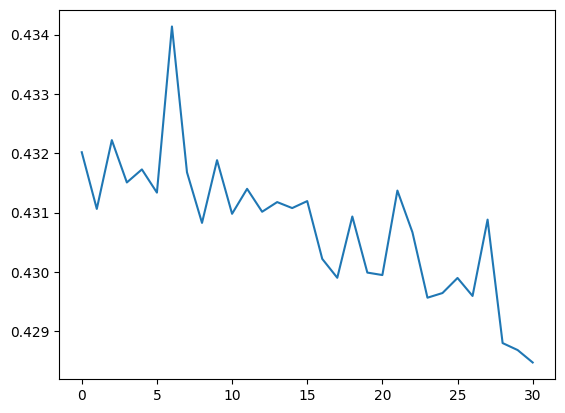

In [96]:
plt.plot(history.history['loss'])

In [ ]:
import pickle as pk
pk.dump(df,open('churn.pkl','wb'))